In [149]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [150]:
df = pd.read_csv('C:/Users/utilisateur/Desktop/Andrea/occaz_auto/dataAuto_clean.csv', sep = ';', index_col=[0])

In [151]:
df.head()

,Marque,Année,Code Postal,Carburant,Emission Co2,Transmission,nbPortes,nbPlace,Kilométrage,Prix
0,OPEL,2017,31,Diesel,110-130,Manuelle,5,5,119000,13900
1,VOLKSWAGEN,2011,55,Diesel,110-130,Manuelle,5,5,72330,13490
2,AUDI,2016,24,Diesel,110-130,Manuelle,5,5,114100,17990
3,OPEL,2016,66,Diesel,110-130,Manuelle,5,5,121019,10990
4,HONDA,2018,69,Diesel,110-130,Manuelle,5,5,88653,21300


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23062 entries, 0 to 23061
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Marque        23062 non-null  object
 1   Année         23062 non-null  int64 
 2   Code Postal   23062 non-null  int64 
 3   Carburant     23062 non-null  object
 4   Emission Co2  23062 non-null  object
 5   Transmission  23062 non-null  object
 6   nbPortes      23062 non-null  int64 
 7   nbPlace       23062 non-null  int64 
 8   Kilométrage   23062 non-null  int64 
 9   Prix          23062 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 1.9+ MB


In [153]:
df.isna().sum() 
df.isna().any()

Marque          False
Année           False
Code Postal     False
Carburant       False
Emission Co2    False
Transmission    False
nbPortes        False
nbPlace         False
Kilométrage     False
Prix            False
dtype: bool

In [154]:
df['Année'].value_counts()

2020    5026
2021    3652
2022    3382
2019    3228
2018    2186
2017    1746
2016     993
2015     638
2014     463
2013     375
2023     342
2012     313
2011     226
2010     161
2009     115
2008      85
2007      61
2006      27
2004      16
2005      14
2002       5
2003       4
2000       1
1970       1
1999       1
2001       1
Name: Année, dtype: int64

In [155]:
df.sort_values('Prix', ascending=False)

,Marque,Année,Code Postal,Carburant,Emission Co2,Transmission,nbPortes,nbPlace,Kilométrage,Prix
13486,RENAULT,2022,79,Essence,110-130,Manuelle,5,5,16500,51590
5502,BMW,2021,74,Diesel,110-130,Manuelle,5,5,16500,51590
7928,BMW,2021,85,Diesel,110-130,Manuelle,5,5,111,50270
15912,PEUGEOT,2022,21,Essence,110-130,Manuelle,5,5,111,50270
14919,DACIA,2018,24,Essence,110-130,Manuelle,5,5,27951,49000
...,...,...,...,...,...,...,...,...,...,...
18121,TESLA,2020,92,Electric,110,Automatique,5,5,278751,2650
22365,KIA,2020,34,Diesel,130-180,Manuelle,5,5,274365,2320
9351,VOLKSWAGEN,2021,53,Essence,110-130,Manuelle,5,5,274365,2320
17335,OPEL,2020,45,Electric,110,Automatique,5,5,274365,2320


In [118]:
df['Marque'].value_counts()

RENAULT       4489
PEUGEOT       3301
CITROEN       3043
VOLKSWAGEN    1465
OPEL          1199
FIAT           991
FORD           943
DACIA          911
AUDI           784
BMW            733
NISSAN         626
SEAT           587
MINI           553
KIA            525
HYUNDAI        495
DS             428
SKODA          314
JEEP           284
MERCEDES       269
TOYOTA         237
MAZDA          173
SUZUKI         122
VOLVO          112
LAND            78
JAGUAR          76
HONDA           57
ALFA            51
MITSUBISHI      37
TESLA           36
LEXUS           36
SSANGYONG       27
MG              17
BOLLORE         14
CHEVROLET       14
SERES           11
SUBARU           6
PORSCHE          5
CUPRA            5
LANCIA           4
DODGE            2
DAIHATSU         1
SANTANA          1
Name: Marque, dtype: int64

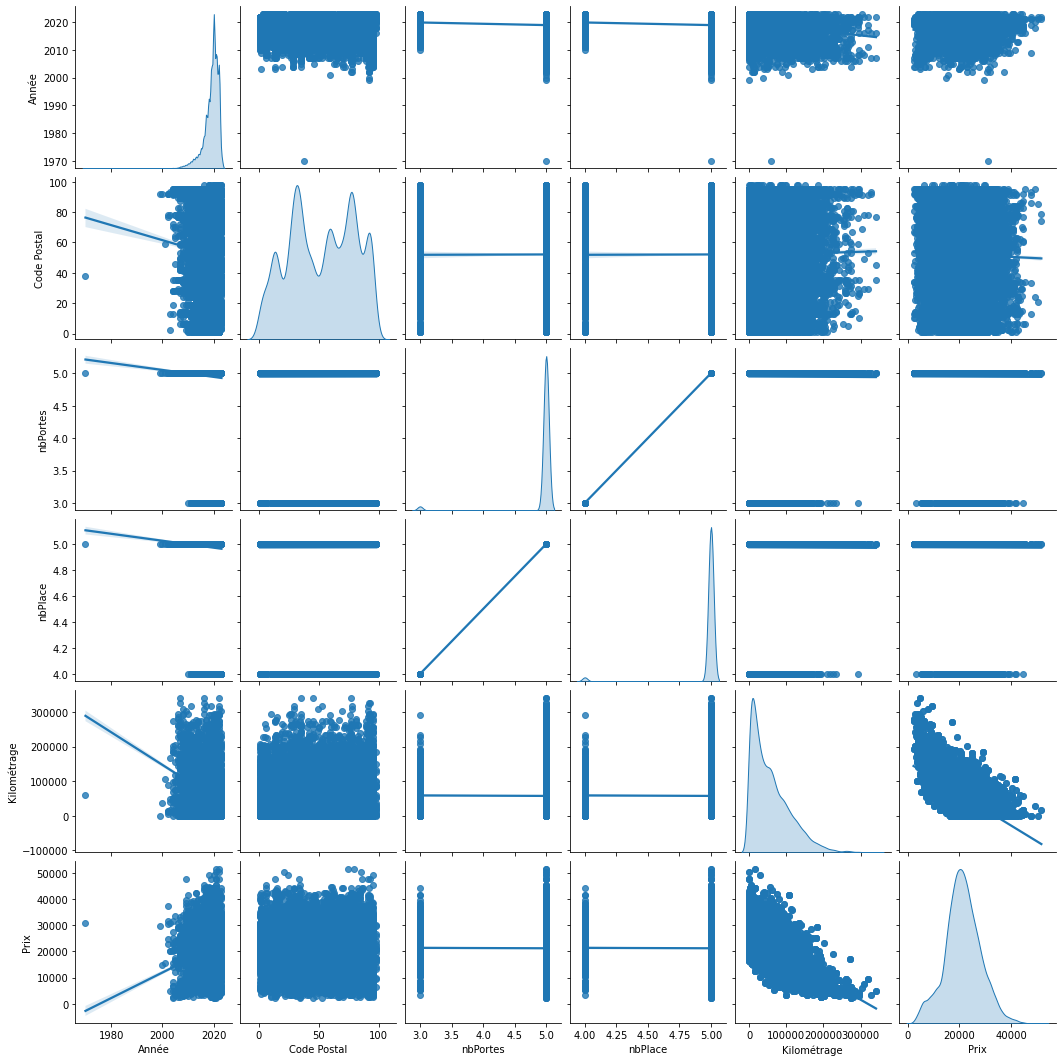

In [156]:
sns.pairplot(df, kind='reg', diag_kind='kde');

In [80]:
df['Code Postal'].value_counts()

24    45
69    35
78    26
66    22
95    19
33    18
35    15
47    12
57    11
67    10
28    10
92     9
31     8
37     8
63     8
55     8
27     8
25     8
74     8
30     7
11     6
91     6
77     6
80     5
45     4
71     4
42     4
26     4
61     4
72     3
38     3
1      3
60     3
59     3
51     2
75     2
84     2
10     2
76     2
36     1
68     1
6      1
18     1
16     1
Name: Code Postal, dtype: int64

In [82]:
df.describe()

,Année,Kilométrage,Code Postal,Prix
count,368.000000,368.000000,368.000000,368.000000
mean,2017.201087,69490.557065,52.864130,37550.434783
std,4.739284,48423.943262,24.213245,43953.172584
min,1956.000000,1.000000,1.000000,7870.000000
25%,2016.000000,30193.000000,30.000000,17475.000000
50%,2018.000000,63175.500000,57.000000,25495.000000
75%,2020.000000,100534.000000,69.500000,37615.000000
max,2023.000000,201049.000000,95.000000,462830.000000


In [83]:
df['Model'].value_counts()

II 1.2 PURETECH 100 S&S GT                                            3
IV 1.5 DCI 115 BLUE INTENS EDC                                        3
2.0 D240 14CV 4WD SE R-DYNAMIC AUTO                                   2
II 2.0 BLUEHDI 180 S&S GT EAT6                                        2
II (3) 1.6 BLUEHDI 100 S&S BUSINESS M                                 2
                                                                     ..
III COOPER S 192 BVA7 5P                                              1
II (2) 33 L2H2 BLUEHDI 130 BUSINESS BV6                               1
1.5 109 CDI 90 LONG                                                   1
III 180 D AMG LINE EDITION 7G-DCT                                     1
VII (2) 1.6 TDI 115 BLUEMOTION TECHNOLOGY CONFORT BUSINESS DSG7 5P    1
Name: Model, Length: 353, dtype: int64

In [84]:
df = pd.get_dummies(df, columns=['Marque'], drop_first=True)


In [85]:
df.sort_values('Année')

,Model,Année,Kilométrage,Code Postal,Prix,Marque_AUDI,Marque_BMW,Marque_CADILLAC,Marque_CHEVROLET,Marque_CITROEN,...,Marque_OPEL,Marque_PEUGEOT,Marque_PORSCHE,Marque_RENAULT,Marque_SEAT,Marque_SKODA,Marque_SUBARU,Marque_TOYOTA,Marque_VOLKSWAGEN,Marque_VOLVO
97,COUPE,1956,144461,67,46330,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
298,COUPE 4.0 BVA,1998,162564,28,26600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228,(996) (2) 3.6 CARRERA TARGA,2001,57875,74,56120,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
303,(2) ML 270 CDI BVA,2002,178244,11,11880,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
315,II 500 BVA,2003,141482,95,21760,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,II (2) 1.0 FIREFLY TURBO 100 S/S LIFE PLUS,2022,56,92,22260,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,III C E 95 (RED),2022,55,92,24570,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,1.5 BLUEHDI 130 S&S 7CV FEEL EAT8,2022,40625,24,36980,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
154,II 1.2 PURETECH 100 S&S ALLURE PACK MY21,2023,12,33,24760,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [86]:
df.drop(labels = 97, axis=0)

,Model,Année,Kilométrage,Code Postal,Prix,Marque_AUDI,Marque_BMW,Marque_CADILLAC,Marque_CHEVROLET,Marque_CITROEN,...,Marque_OPEL,Marque_PEUGEOT,Marque_PORSCHE,Marque_RENAULT,Marque_SEAT,Marque_SKODA,Marque_SUBARU,Marque_TOYOTA,Marque_VOLKSWAGEN,Marque_VOLVO
0,(G01) XDRIVE30DA 265 M SPORT,2020,27930,66,61620,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0 TSI 110 CARAT DSG,2020,20570,25,30120,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,(F11) (2) TOURING 530D XDRIVE 258 EXECUTIVE BVA8,2017,116492,78,32540,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,II 1.5 DCI 110 N-CONNECTA,2015,104610,31,16550,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,VIII 2.0 TSI 320 R DSG7,2020,59,92,81300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,(2) 2.0 HDI 163 FAP SIGNATURE BVA,2011,124177,11,10420,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
364,IV 1.2 TCE 130 ENERGY INTENS EDC,2018,47580,31,20110,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
365,III (2) COMBI 2.0 TDI SCR 150 8CV BUSINESS DSG7,2020,17918,30,33970,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
366,(2) 2.0 TDI ULTRA 150 AMBIENTE,2015,81339,78,27810,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
df.drop(['Model'], axis = 1, inplace = True)
df.head()

,Année,Kilométrage,Code Postal,Prix,Marque_AUDI,Marque_BMW,Marque_CADILLAC,Marque_CHEVROLET,Marque_CITROEN,Marque_CUPRA,...,Marque_OPEL,Marque_PEUGEOT,Marque_PORSCHE,Marque_RENAULT,Marque_SEAT,Marque_SKODA,Marque_SUBARU,Marque_TOYOTA,Marque_VOLKSWAGEN,Marque_VOLVO
0,2020,27930,66,61620,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,20570,25,30120,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2017,116492,78,32540,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,104610,31,16550,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020,59,92,81300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [88]:
X = df.drop(['Prix'], axis=1)
y = df.Prix

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)

In [90]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test,y_test))

0.7726343562303549
0.7450493902451882


In [ ]:
lr.coef_

array([ 5.40532086e+03, -6.58650370e+03,  7.77912269e+02, -6.94142083e+13,
       -4.18988833e+13, -7.50688247e+16, -1.23288078e+13, -5.45353673e+13,
       -1.23288078e+13, -1.74057882e+13, -2.12811157e+13, -1.74057882e+13,
       -1.23288078e+13, -2.73792278e+13, -2.99405063e+13, -1.23288078e+13,
       -2.12811157e+13, -2.45310572e+13, -2.99405063e+13, -3.44520669e+13,
       -2.12811157e+13, -2.73792278e+13, -6.21594417e+13, -1.23288078e+13,
       -3.22832493e+13, -2.45310572e+13, -3.44520669e+13, -7.55411538e+13,
       -4.50951987e+13, -6.85758462e+13, -1.74057882e+13, -2.45310572e+13,
       -1.23288078e+13, -2.73792278e+13, -5.45353673e+13,  0.00000000e+00])